# Imports

In [15]:
import os
import time
import analyze
import PyQt5
import utils.archive        as archive
import matplotlib.pyplot    as plt
import matplotlib.animation as animation
from numba          import jit
from numba.typed    import List
from numpy          import *
from GameOfLife     import *
from GoL_utils      import *
from distance       import *

# Config

In [2]:
verbose     = False
GridSizeX   = 51
GridSizeY   = 51
Steps       = 1000
InitialGrid = random.choice(a=[False, True], size=(GridSizeX, GridSizeY), p=[0.5, 0.5])
path        = archive.new(name=f"Classic_{GridSizeX}x{GridSizeY}x{Steps}")

# Run

In [3]:
grid      = InitialGrid
loading   = ["/","-","\\","|"]
evolution = array(start(grid, Steps, verbose = True),dtype=bool)

file = f"{path}/GridEvolution"
savez_compressed(file, evolution.astype(bool))

👾 Running Game of Life... Step: 1000/1000 (100 %) ✅


# Vitality and generations - Average on time

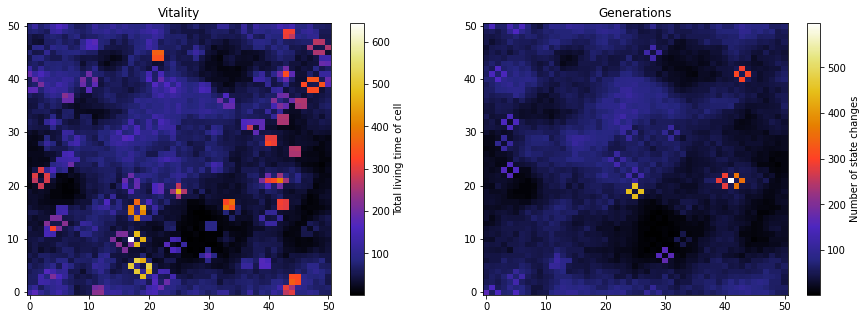

In [4]:

vitality = zeros([GridSizeX,GridSizeY])
generations = zeros([GridSizeX,GridSizeY])
evolution_int = evolution.astype('int')
for i,v in enumerate(evolution_int):
    if i%10 == 0 and verbose: print(f"🔎 Analyzing... Step: {i} / {Steps} ({i/Steps*100:.0f} %)", end='\r')
    vitality += v
    if i > 0: generations += abs(evolution_int[i] - evolution_int[i-1])

x = arange(GridSizeX)
y = arange(GridSizeY)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pcolor(x,y,vitality, shading='auto', cmap="CMRmap")
plt.colorbar(label='Total living time of cell')
plt.title("Vitality")

plt.subplot(1,2,2)
plt.pcolor(x,y,generations, shading='auto', cmap="CMRmap")
plt.colorbar(label='Number of state changes')
plt.title("Generations")
plt.savefig(f"{path}/vitality_and_generations_over_time.png")
plt.show()

# Vitality and generations - Average on space

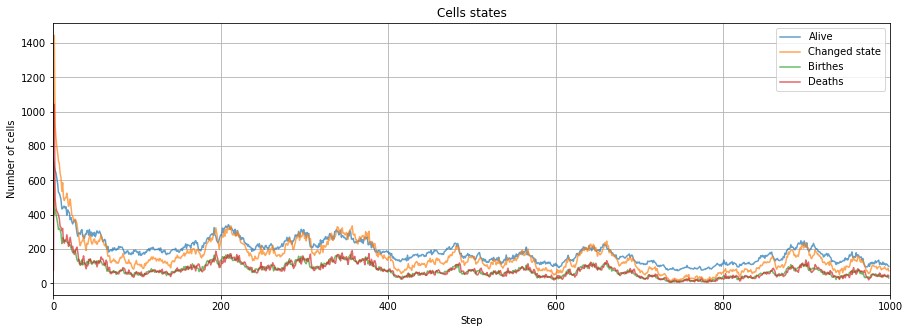

In [5]:
living = []
generation = []
born = []
dead = []

for i,v in enumerate(evolution[1:]):
    living.append(sum(v))
    diff = v.astype(int) - evolution[i-1]
    generation.append(sum(abs(diff)))
    born.append(sum(diff == 1))
    dead.append(sum(diff == -1))


plt.figure(figsize=[15,5])
plt.plot(arange(len(evolution)-1),living, label="Alive", alpha=0.7)
plt.plot(arange(len(evolution)-1),generation, label = "Changed state", alpha=0.7)
plt.plot(arange(len(evolution)-1),born, label = "Birthes", alpha=0.7)
plt.plot(arange(len(evolution)-1),dead, label = "Deaths", alpha=0.7)
plt.title("Cells states")
plt.xlabel("Step")
plt.ylabel("Number of cells")
plt.savefig(f"{path}/vitality_and_generations_over_space.png")
plt.legend()
plt.xlim(xmin=0,xmax=len(evolution))
plt.grid()
plt.show()

# Evolution 1D

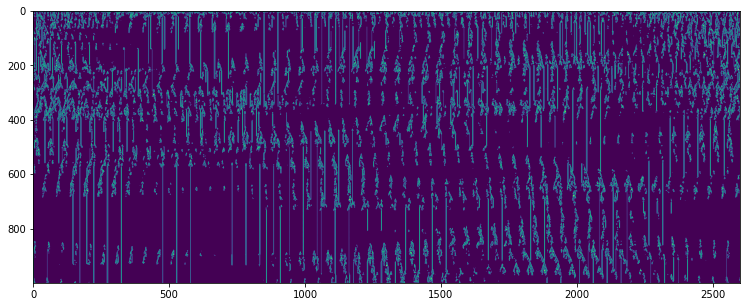

In [6]:
evolution1D = empty([Steps, GridSizeX * GridSizeY])
for i, v in enumerate(evolution):
    v = v.reshape(GridSizeX * GridSizeY)
    evolution1D[i] = v

plt.imsave(f'{path}/evolution1D.png', evolution1D)
plt.figure(figsize=[30,5])
plt.imshow(evolution1D)
plt.show()

# Evolution 3D

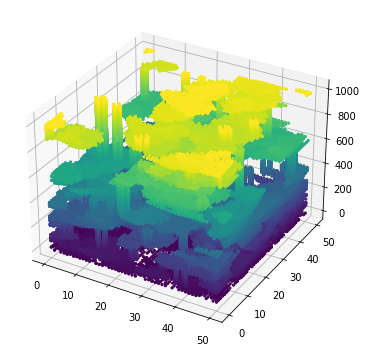

In [37]:
fig = plt.figure(figsize=[15, 5])
ax = fig.add_subplot(111, projection='3d')
z, x, y = evolution.nonzero()
ax.scatter(x, y, z, c=z, alpha=1, marker=".")

plt.savefig(f"{path}/evolution3D.png")
plt.show()

# Tychonov Distance

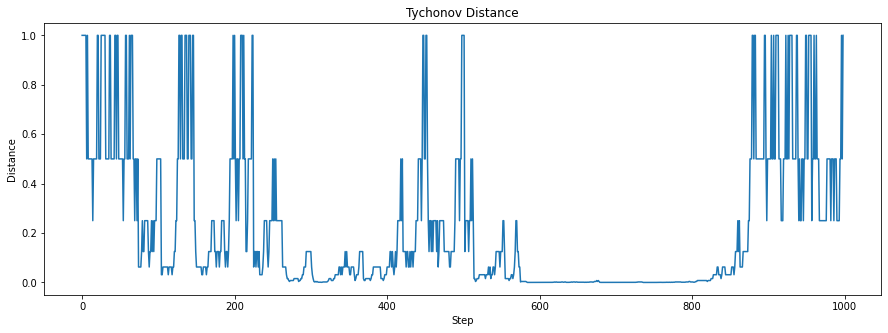

In [7]:
td = []
for i,v in enumerate(evolution[1:]):
    td.append(tychonov_distance(evolution[i-1],v))

plt.figure(figsize=[15,5])
plt.plot(arange(len(evolution)-1),td)
plt.title("Tychonov Distance")
plt.xlabel("Step")
plt.ylabel("Distance")
plt.savefig(f"{path}/distance.png")
plt.show()

# Main asymptotic Lyapunov exponent

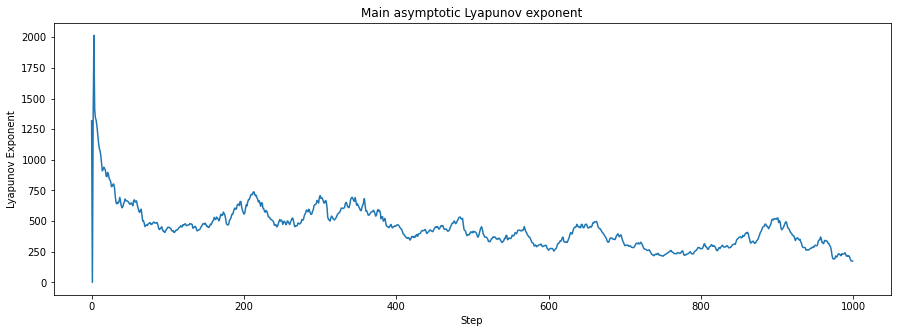

In [8]:
X  = zeros([GridSizeX,GridSizeY])
dX = evolution[0].astype(int)
X0 = X + dX
d0 = sum(abs(dX))

phi = [dX]
phin = [dX]
dn = [d0]
Xn = [X0]
for i,grid in enumerate(evolution[1:].astype(int)):
    phi.append(grid - evolution[i-1])
    phin.append(sum(phi,axis=0))
    Xn.append(phin[i] + dn[i]/d0 * (phi[i] - phin[i]))
    dn.append(sum(abs(phi[i] - phin[i])))

plt.figure(figsize=[15,5])
plt.plot(arange(len(evolution)),dn)
# plt.plot(arange(len(evolution)),[1/len(evolution) * sum(log(array([dk/d0 for dk in dn]))) for _ in range(len(evolution))])
plt.title("Main asymptotic Lyapunov exponent")
plt.xlabel("Step")
plt.ylabel("Lyapunov Exponent")
plt.savefig(f"{path}/distance.png")
plt.show()
plt.show()

# Generating animation

MovieWriter ffmpeg unavailable; using Pillow instead.



🎞️ Generating animation... Step: 1000/1000 (100 %) ✅

📀  Saving animation... ✅.. Step: 1000/1000 (100 %)
   -> Saved in ./archives/2022-06-25_cccec46/6_Classic_51x51x1000/evolution.gif


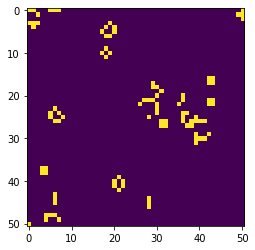

In [9]:
analyze.generate_animation(evolution, save_as=f"{path}/evolution.gif", verbose = True)
plt.show()